In [14]:
import numpy as np
from cross_validation import *
import sys
import os
import csv
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("src/"))
sys.path.append(os.path.abspath("data/raw/"))

#from tools import stratified_split
from data_loading import (
    load_data,
    load_features_dict,
)
from data_processing import preprocess_features
from implementations import logistic_regression
from models import sigmoid,compute_loss_logistic,reg_l2_logistic_regression
from utils import calculate_accuracy,calculate_f1_score

In [15]:
###### PATHS ######
data_path = "data/"
json_path = "feature_dict.json"

In [16]:
###### LOAD DATA ######
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path)

feature_dict_ = load_features_dict(json_path)

x_train_processed, x_test_processed, feature_names_processed, feature_dict_processed = preprocess_features(
    x_train, x_test, feature_names, feature_dict_
)

Loading raw data...
Data loaded.


FileNotFoundError: [Errno 2] No such file or directory: 'feature_dict.json'

In [6]:
best_loss = 1e10
best_params = None
best_weights = None
k_fold = 3
all_mean_losses = []
all_f1_score = []
gammas = np.linspace(4e-2,6e-2,12)

for gamma in gammas:

    print(f"\nTraining with gamma={gamma}")
    #sets for cross validation
    k_indices = build_k_indices(y_train,k_fold,seed=42)

    # Initialize weights
    initial_w = np.zeros(x_train_processed.shape[1])
    Losses = []     #losses for different k 
    f1_scores = []
    # Train the model and get all losses and weights
    for k in range(k_fold):
        x_train_cross,y_train_cross,x_test_cross,y_test_cross = sets_for_cross_validation(y_train,x_train_processed,k_indices,k)
        print('sets faits')
        w, loss = logistic_regression(y_train_cross, x_train_cross, initial_w, 500, gamma)
        print('logistic_regression faite')
        loss = compute_loss_logistic(y_test_cross,x_test_cross,w)

        y_val_pred_prob = sigmoid(x_test_cross @ w)
        y_val_pred = np.where(y_val_pred_prob >= 0.5, 1, 0)
        # Calculate F1 score and accuracy
        f1 = calculate_f1_score(y_test_cross, y_val_pred)
        acc = calculate_accuracy(y_test_cross, y_val_pred)

        f1_scores.append(f1)
        Losses.append(loss)
    
    mean_loss = np.mean(Losses)
    all_mean_losses.append(mean_loss)
    f1_score_mean = np.mean(f1_scores)
    all_f1_score.append(f1_score_mean)

    # Update best model if this one is better
    if mean_loss < best_loss:
        best_loss = mean_loss
        best_params = gamma
        best_weights = w
        print(f"New best model found! With training loss: {loss:.4f}")

        y_val_pred_prob = sigmoid(x_test_cross @ w)
        y_val_pred = np.where(y_val_pred_prob >= 0.5, 1, 0)

        # Calculate F1 score and accuracy
        f1 = calculate_f1_score(y_test_cross, y_val_pred)
        acc = calculate_accuracy(y_test_cross, y_val_pred)

        print(f"Threshold: 0.5, F1 Score: {f1:.4f}, Accuracy: {acc * 100:.2f}%")



print("\nBest hyperparameters:", best_params)
print(f"Best loss: {best_loss:.4f}")



Training with gamma=0.04
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2310
Threshold: 0.5, F1 Score: 0.1214, Accuracy: 91.22%

Training with gamma=0.04181818181818182
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2308
Threshold: 0.5, F1 Score: 0.1246, Accuracy: 91.22%

Training with gamma=0.04363636363636364
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2306
Threshold: 0.5, F1 Score: 0.1287, Accuracy: 91.24%

Training with gamma=0.045454545454545456
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2304
Threshold: 0.5, F1 Score: 0.1333, Accuracy: 91.26%

Train

C:\Users\41774\AppData\Local\Temp\ipykernel_14436\2259490717.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


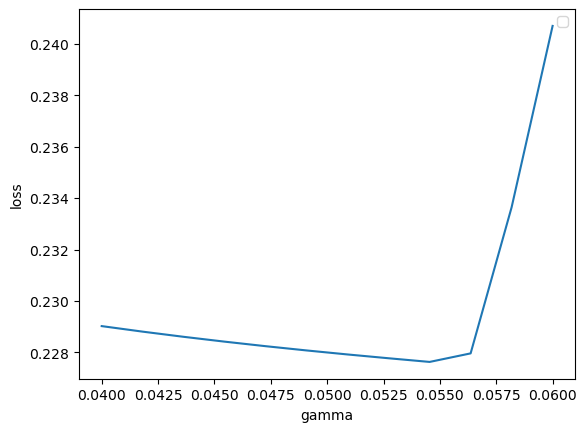

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(gammas,all_mean_losses)
plt.legend()
plt.xlabel('gamma')
plt.ylabel('loss')
plt.show()
plt.savefig('cross_validation gamma')

In [10]:
print('Best hyperparameters: 0.05454545454545454')

Best hyperparameters: 0.05454545454545454


In [10]:
best_loss = 1e10
best_f1 = 0
best_threshold = 0
k_fold = 3
all_mean_losses = []
all_f1_score = []
all_mean_acc = []
thresholds = np.linspace(0.17,0.2,4)

for threshold in thresholds:

    print(f"\nTraining with threshold={threshold}")
    #sets for cross validation
    k_indices = build_k_indices(y_train,k_fold,seed=42)

    # Initialize weights
    initial_w = np.zeros(x_train_processed.shape[1])
    Losses = []     #losses for different k 
    f1_scores = []
    accs=[]

    # Train the model and get all losses and weights
    for k in range(k_fold):
        x_train_cross,y_train_cross,x_test_cross,y_test_cross = sets_for_cross_validation(y_train,x_train_processed,k_indices,k)
        print('sets faits')
        w, loss = logistic_regression(y_train_cross, x_train_cross, initial_w, 500, 0.05454545)
        print('logistic_regression faite')
        loss = compute_loss_logistic(y_test_cross,x_test_cross,w)

        y_val_pred_prob = sigmoid(x_test_cross @ w)
        y_val_pred = np.where(y_val_pred_prob >= threshold, 1, 0)

        # Calculate F1 score and accuracy
        f1 = calculate_f1_score(y_test_cross, y_val_pred)
        acc = calculate_accuracy(y_test_cross, y_val_pred)

        accs.append(acc)
        f1_scores.append(f1)
        Losses.append(loss)
    
    f1_score_mean = np.mean(f1_scores)
    all_f1_score.append(f1_score_mean)
    acc_mean = np.mean(accs)
    all_mean_acc.append(acc_mean)
    all_mean_losses.append(np.mean(Losses))
        
    # Update best model if this one is better
    if f1_score_mean > best_f1:
        best_f1 = f1_score_mean
        best_threshold = threshold
        print(f"New best model found! With training loss: {np.mean(Losses):.4f}")

        
        print(f"Threshold: {threshold}, F1 Score: {f1_score_mean:.4f}, Accuracy: {acc_mean * 100:.2f}%")



print("\nBest hyperparameters:", best_threshold)
print(f"Best loss: {best_loss:.4f}")
print(f"Best F1 score: {best_f1:.4f}")


Training with threshold=0.17
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2276
Threshold: 0.17, F1 Score: 0.4073, Accuracy: 84.71%

Training with threshold=0.18000000000000002
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2276
Threshold: 0.18000000000000002, F1 Score: 0.4082, Accuracy: 85.46%

Training with threshold=0.19
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite
New best model found! With training loss: 0.2276
Threshold: 0.19, F1 Score: 0.4090, Accuracy: 86.13%

Training with threshold=0.2
sets faits
logistic_regression faite
sets faits
logistic_regression faite
sets faits
logistic_regression faite

Best hyperparameters: 0.19
Best loss: 10000000000.0000
Best F1 score: 0.4090


C:\Users\41774\AppData\Local\Temp\ipykernel_12824\2167798232.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


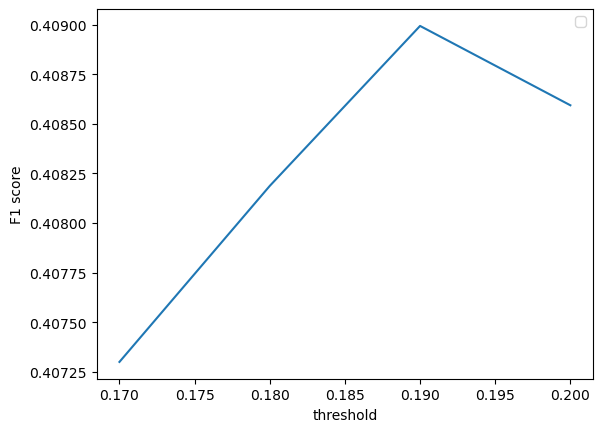

[0.4073009737348703, 0.4081872509999942, 0.4089929263292467, 0.4085933293018511] [0.17 0.18 0.19 0.2 ]


In [11]:
plt.plot(thresholds,all_f1_score)
plt.legend()
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.show()
#plt.savefig('cross_validation threshold')

print(all_f1_score,thresholds)

f1 and thresholds : [0.40059376293743726, 0.4073009737348703,0.4081872509999942, 0.4089929263292467, 0.4085933293018511, 0.4066567872556662, 0.3948516571865995, 0.37766215897774624, 0.3545449657700823] [0.15 0.17 0.18 0.21 0.24 0.27 0.3 ]


C:\Users\41774\AppData\Local\Temp\ipykernel_12824\2545492060.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


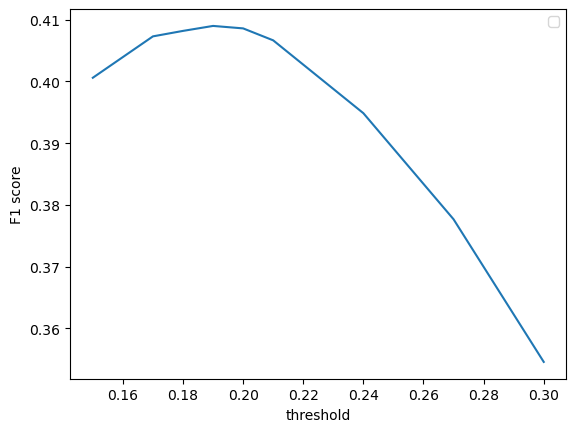

<Figure size 640x480 with 0 Axes>

In [14]:
print('f1 and thresholds : [0.40059376293743726, 0.4073009737348703,0.4081872509999942, 0.4089929263292467, 0.4085933293018511, 0.4066567872556662, 0.3948516571865995, 0.37766215897774624, 0.3545449657700823] [0.15 0.17 0.18 0.21 0.24 0.27 0.3 ]')
thresholds = [0.15, 0.17, 0.18,0.19,0.20, 0.21, 0.24, 0.27, 0.3]
all_f1 = [0.40059376293743726, 0.4073009737348703,0.4081872509999942, 0.4089929263292467, 0.4085933293018511, 0.4066567872556662, 0.3948516571865995, 0.37766215897774624, 0.3545449657700823]
plt.plot(thresholds,all_f1)
plt.legend()
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.show()
plt.savefig('cross_validation threshold')

In [21]:
best_loss = 1e10
best_f1 = 0
best_threshold = 0
k_fold = 3
all_mean_losses = []
all_f1_score = []
all_mean_acc = []
lambdas = np.linspace(0,5,6)

for lambda_ in lambdas:

    print(f"\nTraining with lambda={lambda_}")
    #sets for cross validation
    k_indices = build_k_indices(y_train,k_fold,seed=42)

    # Initialize weights
    initial_w = np.zeros(x_train_processed.shape[1])
    Losses = []     #losses for different k 
    f1_scores = []
    accs=[]

    # Train the model and get all losses and weights
    for k in range(k_fold):
        x_train_cross,y_train_cross,x_test_cross,y_test_cross = sets_for_cross_validation(y_train,x_train_processed,k_indices,k)
        print('sets faits')
        w, loss = reg_l2_logistic_regression(y_train_cross, x_train_cross,lambda_, initial_w, 500, 0.05454545,1)
        print('logistic_regression faite')
        loss = compute_loss_logistic(y_test_cross,x_test_cross,w) + np.sum(np.square(w))

        y_val_pred_prob = sigmoid(x_test_cross @ w)
        y_val_pred = np.where(y_val_pred_prob >= 0.19, 1, 0)

        # Calculate F1 score and accuracy
        f1 = calculate_f1_score(y_test_cross, y_val_pred)
        acc = calculate_accuracy(y_test_cross, y_val_pred)

        accs.append(acc)
        f1_scores.append(f1)
        Losses.append(loss)
    
    f1_score_mean = np.mean(f1_scores)
    all_f1_score.append(f1_score_mean)
    acc_mean = np.mean(accs)
    all_mean_acc.append(acc_mean)
    all_mean_losses.append(np.mean(Losses))
        
    # Update best model if this one is better
    if np.mean(Losses) > best_loss:
        best_loss = np.mean(Losses)
        best_lambda = lambda_
        print(f"New best model found! With training loss: {np.mean(Losses):.4f}")

        
        print(f"Threshold: 0.5, F1 Score: {f1_score_mean:.4f}, Accuracy: {acc_mean * 100:.2f}%")



print("\nBest hyperparameters:", lambda_)
print(f"Best loss: {best_loss:.4f}")
print(f"Best F1 score: {best_f1:.4f}")


Training with lambda=0.0


NameError: name 'x_train_processed' is not defined